# Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave
or not in the next 6 months. 

### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers
leaving and joining another service provider. It is important to understand which aspects of the service
influence a customer's decision in this regard. Management can concentrate efforts on improvement of
service, keeping in mind these priorities.



 Drop the columns which are unique for all users like IDs (5 points)


# 1.0 Load libraries and dataset

## 1.1 Libraries and raw data analysis

In [1]:
# Load the required libraries

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

raw_bank_data = pd.read_csv("bank.csv") # read a cvs file that contains the dataset for a bank
raw_bank_data.info()


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2]:
raw_bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1.2 Feature Engineering

We notice that RowNumber, CustomerId and Surname do not appear be more than weak correlation to the exit outcome of customers. Therefore, they should be dropped.

In [3]:
bank_data = raw_bank_data.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


The data type of Geography and gender needs to be converted to categorical type because they are in 'object' type right now.

In [5]:
bank_data['Geography'] = bank_data['Geography'].astype('category') # Convert Geography data into categorical type
bank_data['Gender'] = bank_data['Gender'].astype('category') # Convert Gender data into categorical type

In [6]:
bank_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 1.3 Convert categorical data to integer data

In [7]:
bank_data_clean = pd.get_dummies(bank_data) # convert object data to categorical 
bank_data_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2.0 Create feature and target set

## 2.1 Create feature and target set
Distinguish the feature and target set (5 points)

In [8]:
X = bank_data_clean.drop(columns=['Exited']) # Distinguish the feature and target set
y = bank_data_clean[['Exited']] 

Exited
0    7963
1    2037
Name: Exited, dtype: int64
% of stayed count of 79.63%


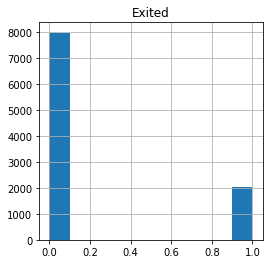

In [9]:
y.hist(stacked=False, figsize=(4, 4)) # There is an imbalance count of Exited and Stayed data in the dataset
print(y.groupby('Exited')['Exited'].count())  # The imbalance 
print(f"% of stayed count of {y[y['Exited']==0].shape[0]/y.shape[0]*100}%")

% of stayed count vs exited count is about 79.63%, which is imbalance but still not considered very high.

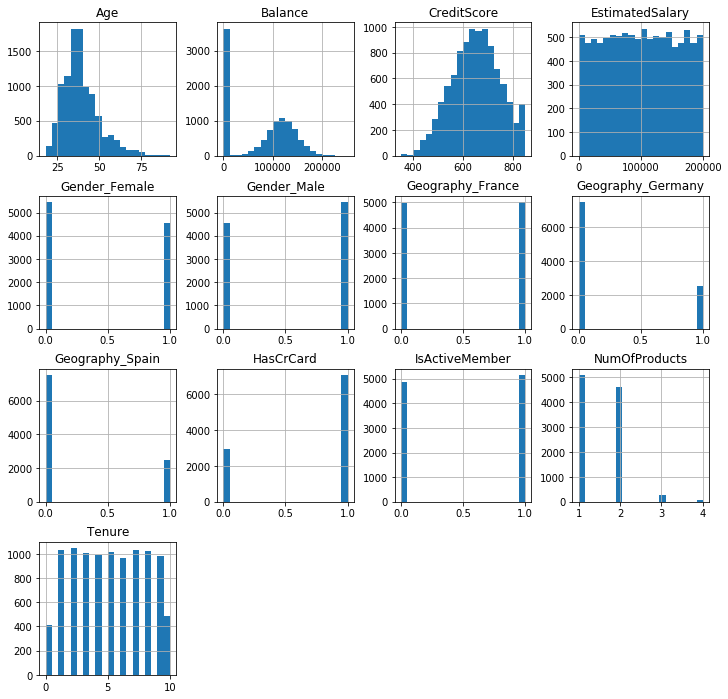

In [10]:
X.hist(stacked=False, bins=20, figsize=(12, 12)); # Generate graphs to study the distribution of data

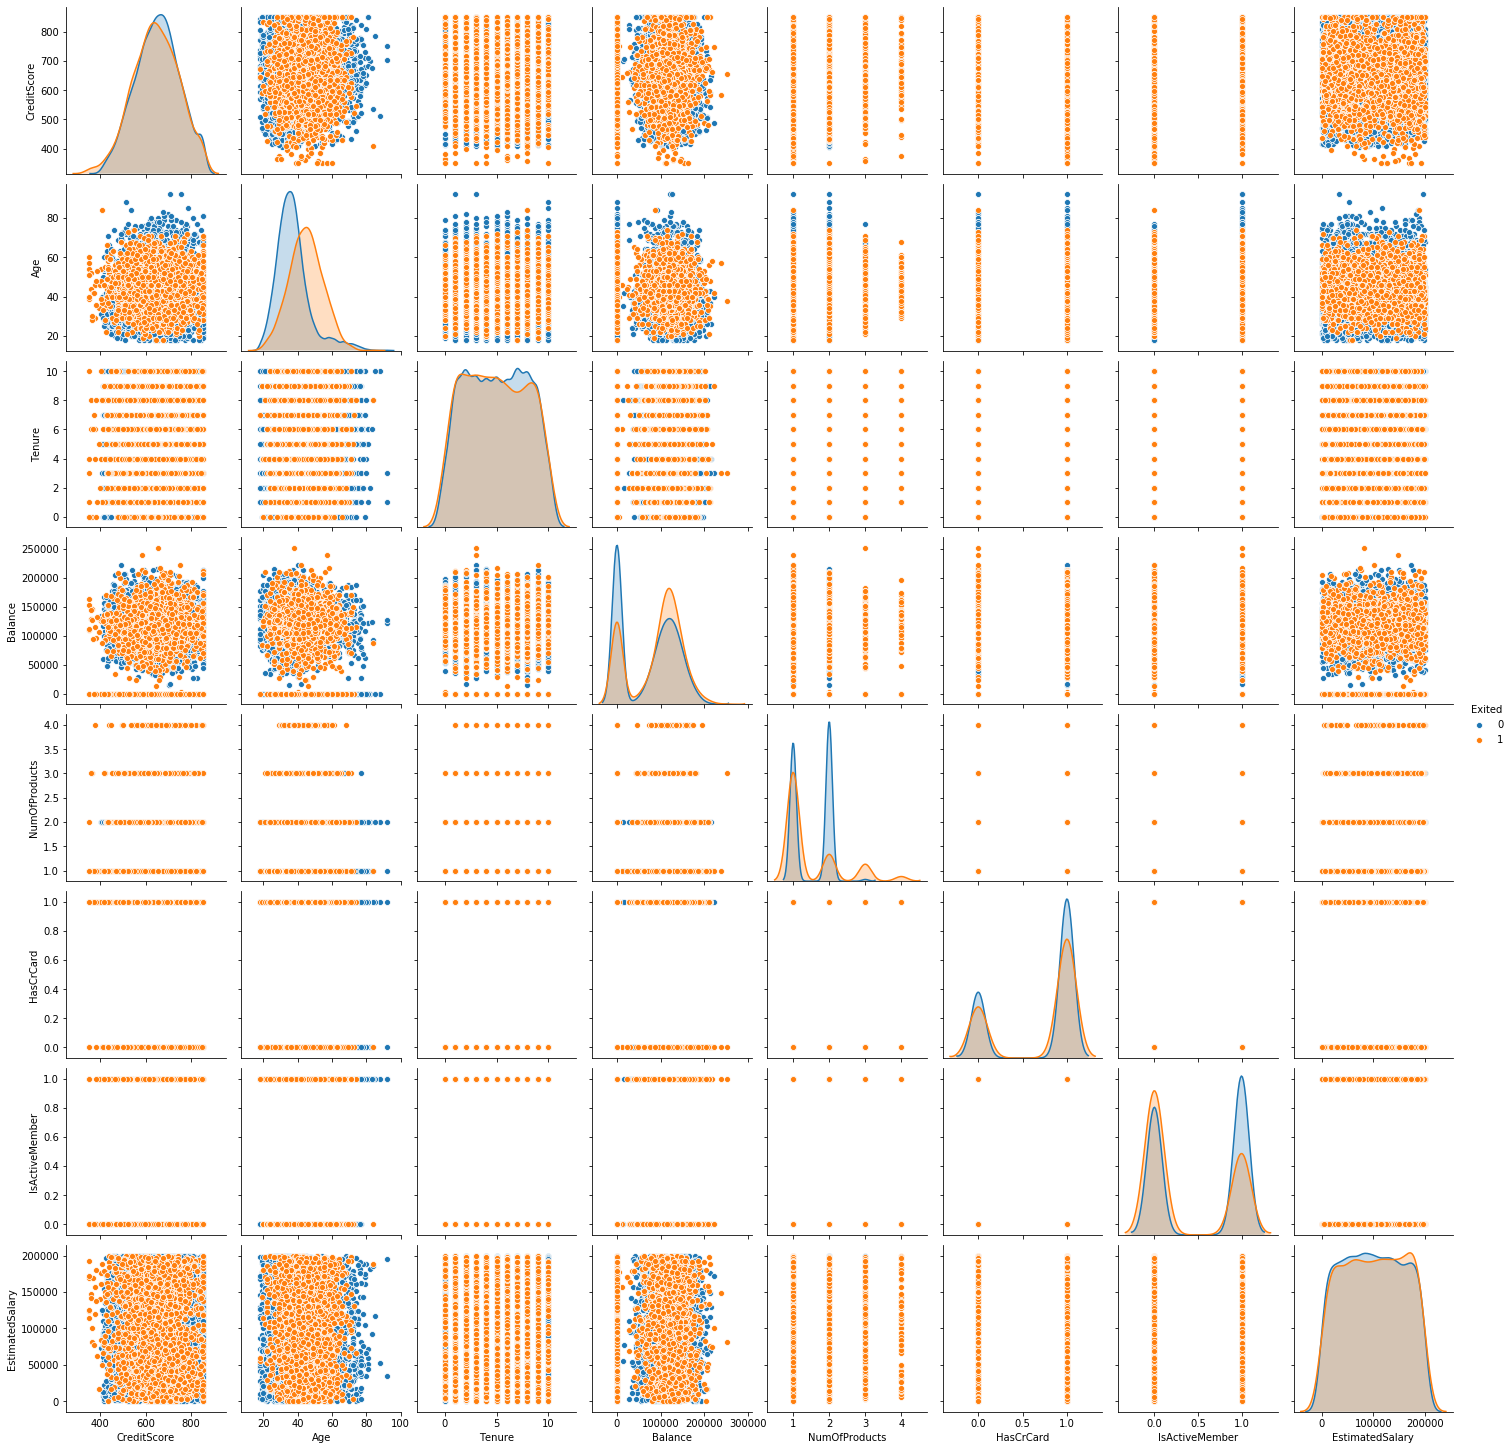

In [12]:
sns.pairplot(bank_data, hue="Exited") # Generate pairplot graphs that are classified by 

There is a balance dataset that is right skewed with high number of count at 0. Otherwise, there is no other datasets with significant outliers that require further data cleansing.

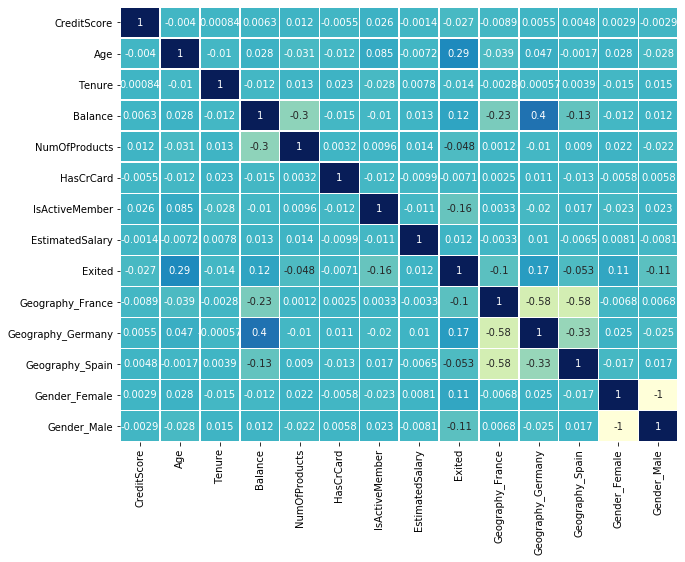

In [13]:
plt.figure(figsize=(10,8))

# Generate correlation matrix and show it using heat map
sns.heatmap(
    bank_data_clean.corr(),
    annot=True,
    linewidths=.5,
    center=0,
    cbar=False,
    cmap="YlGnBu"
)

plt.show()

We discover that Age, and to some extend balance have positive and linearly correlation with Exited members.

# 3.0 Setup training and test sets
Divide the data set into training and test sets (5 points)

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.30, random_state=0) # Split the feature and target data to 70% train and 30% test data


In [15]:
type(X_train) # Check to make sure that it's a numpy array

numpy.ndarray

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # check the row and column sizes

((7000, 13), (3000, 13), (7000, 1), (3000, 1))

The shapes of training and test data show that the dataset is split according to a 70% and 30% rule.

In [17]:
X_train

array([[641.,  33.,   2., ...,   0.,   0.,   1.],
       [541.,  39.,   7., ...,   0.,   0.,   1.],
       [590.,  76.,   5., ...,   0.,   1.,   0.],
       ...,
       [738.,  35.,   5., ...,   0.,   0.,   1.],
       [590.,  38.,   9., ...,   1.,   1.,   0.],
       [623.,  48.,   1., ...,   0.,   1.,   0.]])

# 4.0 Normalize the train and test data (10points)
Normalize the train and test data (10 points)


In [18]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train_scaled = scaler.transform(X_train)

# Scale the test set
X_test_scaled = scaler.transform(X_test)

In [19]:
pd.DataFrame(X_test_scaled).describe() # verify that the dataset is properly scaled to similar mininum and maximum values 

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.000179,0.032557,0.027007,0.068122,-0.023699,-0.019378,-0.011721,0.002957,-0.041148,0.044611,0.003201,-0.038122,0.038122
std,0.979136,1.015659,1.008509,0.983048,1.039743,1.008815,1.000493,0.997101,0.999943,1.025290,1.002035,0.996373,0.996373
min,-2.935750,-1.994743,-1.729696,-1.199755,-0.929716,-1.557669,-1.034302,-1.736420,-1.015259,-0.569872,-0.573171,-0.922958,-1.083473
25%,-0.663431,-0.653408,-0.689679,-1.199755,-0.929716,-1.557669,-1.034302,-0.849583,-1.015259,-0.569872,-0.573171,-0.922958,-1.083473
50%,0.004899,-0.174360,0.003665,0.389573,-0.929716,0.641985,0.966835,0.011807,-1.015259,-0.569872,-0.573171,-0.922958,0.922958
75%,0.652664,0.496308,1.043681,0.857160,0.810394,0.641985,0.966835,0.843292,0.984970,1.754780,-0.573171,1.083473,0.922958
max,2.051015,5.095170,1.737025,2.802861,4.290613,0.641985,0.966835,1.736116,0.984970,1.754780,1.744679,1.083473,0.922958


In [20]:
pd.DataFrame(X_train_scaled).describe() # verify that the dataset is properly scaled to similar mininum and maximum values 

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,-4.388315e-16,-2.175879e-16,2.534481e-17,-1.829013e-16,2.445663e-17,-7.035642e-16,3.368417e-16,-1.399301e-15,3.160646e-16,4.130347e-16,6.907173e-17,1.636152e-16,-1.681829e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-3.089980e+00,-1.994743e+00,-1.729696e+00,-1.199755e+00,-9.297156e-01,-1.557669e+00,-1.034302e+00,-1.737784e+00,-1.015259e+00,-5.698719e-01,-5.731713e-01,-9.229582e-01,-1.083473e+00
25%,-6.942767e-01,-6.534081e-01,-1.036351e+00,-1.199755e+00,-9.297156e-01,-1.557669e+00,-1.034302e+00,-8.535116e-01,-1.015259e+00,-5.698719e-01,-5.731713e-01,-9.229582e-01,-1.083473e+00
50%,1.518062e-02,-1.743599e-01,3.664819e-03,3.293472e-01,-9.297156e-01,6.419848e-01,9.668353e-01,-1.471948e-03,9.849701e-01,-5.698719e-01,-5.731713e-01,-9.229582e-01,9.229582e-01
75%,7.040739e-01,4.963076e-01,6.970090e-01,8.278490e-01,8.103938e-01,6.419848e-01,9.668353e-01,8.604335e-01,9.849701e-01,-5.698719e-01,-5.731713e-01,1.083473e+00,9.229582e-01
max,2.051015e+00,4.424503e+00,1.737025e+00,2.603279e+00,4.290613e+00,6.419848e-01,9.668353e-01,1.736493e+00,9.849701e-01,1.754780e+00,1.744679e+00,1.083473e+00,9.229582e-01


All datasets are properly scaled with mean values at 0.

# 5.0 Initialize and build a model
Initialize & build the model. Identify the points of improvement and implement some models. (20p)

## 5.1 Build a model

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

def build_tf_model(param, optimizer, X_train_scaled_local, y_train_local):
    
    # Build a neural network model with 1 input layer and 1 hidden layer
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(param['nodes1'], activation='relu', input_shape=param['input_shape']),
    tf.keras.layers.Dropout(rate=0.01),    
    tf.keras.layers.Dense(param['nodes2'], activation='tanh'),
    tf.keras.layers.Dropout(rate=0.01),    
    tf.keras.layers.Dense(1, activation='sigmoid') # Use sigmoid activation for binary status
    ])
    
    # Compile a model based on model parameters
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=param['matrix'])
        
    # Fit the independent variables to the Neural Network 
    history = model.fit(
    X_train_scaled_local, y_train_local, batch_size=1000,
    epochs=param['epochs'], validation_split = 0.3, verbose=0)
    #callbacks=[tfdocs.modeling.EpochDots()])
     
    return model, history

In [22]:
import decimal

param = {}
model = []
history = []
parameters = []

for lr in [x / 1000.0 for x in range(1, 10, 4)]: # generate learning rate
    for node in range(16, 130, 64): # generate node number
        
        # Use ADAM optimizer
        optimizer = tf.keras.optimizers.Adam(lr=lr)
        param['input_shape'] = (X_train_scaled.shape[1],) # Define the input shape
        param['nodes1'] = node # Define the number of node for input and hidden layers
        param['nodes2'] = node/2
        param['epochs'] = 100  
        param['matrix'] = ['accuracy'] 
        
        model_temp, history_temp = build_tf_model(param, optimizer, X_train_scaled, y_train) # Train the model using neural network of Tensor Flow
        
        model = [model_temp] + model
        history = [history_temp] + history
        parameters = [{'node':node, 'lr':lr }] + parameters # Save the parameter result
#history = model.fit(
#X_train_scaled, y_train, batch_size=700
#epochs=param['epochs'], validation_split = 0.2, verbose=1)

Use various learning rates and node numbers to train models so that we can choose the best one among them.

## 5.2 Verify the model

In [23]:
results = model[0].evaluate(X_test_scaled, y_test, verbose=0) # Evaluate the validation accuracy
print(f"Loss = {results[0]}, validation accuracy = {results[1]}") 

Loss = 0.46166611242294314, validation accuracy = 0.8289999961853027


In [24]:
X_test_scale_1 = StandardScaler().fit_transform(X_test) # Try to scale the data using fit transform
results = model[0].evaluate(X_test_scale_1, y_test, verbose=0)
print(f"Loss = {results[0]}, validation accuracy = {results[1]}")

Loss = 0.4538429530461629, validation accuracy = 0.8333333134651184


In [25]:
y_test_pred = model[0].predict_proba(X_test_scaled)
pred_result = pd.DataFrame(data=y_test_pred, columns=['prediction'])
pred_result['actual'] = y_test
pred_result[pred_result['prediction']>0.5].head(10) # Visually inspect the prediction result that is more than 0.5

,prediction,actual
5,0.999360,1
9,0.974187,1
13,0.549564,0
14,0.999331,1
15,0.546794,1
20,0.763105,0
34,0.522044,0
41,0.590459,1
44,0.748536,0
50,0.999734,1


 A  visual analysis of 10 sample result shows that actual count of its exited status is more than stayed status when the prediction is more than 0.5.

In [26]:
y_test_pred = model[0].predict_proba(X_test_scaled)
pred_result = pd.DataFrame(data=y_test_pred, columns=['prediction'])
pred_result['actual'] = y_test
pred_result[pred_result['prediction']<0.5].head(10) # Visually inspect the prediction result that is more than 0.5

,prediction,actual
0,0.412748,0
1,0.047286,1
2,0.068790,0
3,0.024258,0
4,0.010541,0
6,0.002600,0
7,0.118222,0
8,0.232095,1
10,0.009379,0
11,0.041333,0


 A  visual analysis of 20 sample result shows that actual count of its Exited status is significantly less than stayed status when the prediction is less than 0.5.

In [27]:
results

[0.4538429530461629, 0.8333333]

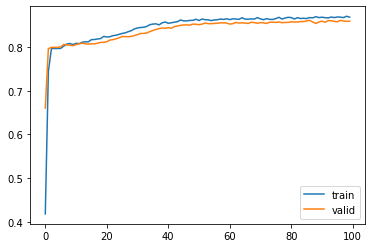

In [28]:
hist  = pd.DataFrame(history[4].history)
hist['epoch'] = history[4].epoch

import matplotlib.pyplot as plt

plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


The neural network model seems to slightly overfit after 40 epoches. However, accuracy values still keep increasing, although not significantly, until about 100 epoches.

# 5.3 Recall score

Since the objective of the business is for banks to focus on problem of 'Churn' i.e. customers leaving and joining another service provider. It is also important to build a model to optimize recall, which is based on True Positive/(True Positive and False Negative). For higher recall, the higher the confidence for the model to predict all the customers who may be leaving in a new dataset with similar independent and dependent variables.

In [29]:
param = {}
recall_model = []
recall_history = []
recall_parameters = []

for lr in [x / 1000.0 for x in range(1, 10, 4)]: # generate learning rate
    for node in range(16, 48, 16): # generate node number
        optimizer = tf.keras.optimizers.Adam(lr=lr)
        param['input_shape'] = (X_train_scaled.shape[1],)
        param['nodes1'] = node
        param['nodes2'] = node/2
        param['epochs'] = 100     
        param['matrix'] = [tf.keras.metrics.Recall()]
        
        model_temp, history_temp = build_tf_model(param, optimizer, X_train_scaled, y_train) # Train the model using neural network of Tensor Flow
        
        recall_model = [model_temp] + recall_model
        recall_history = [history_temp] + recall_history
        recall_parameters = [{'node':node, 'lr':lr }] + recall_parameters # Save the parameter result

# 6.0 Evaluate the model
Predict the results using 0.5 as a threshold (10points)

## 6.1 Choose the best model based on accuracy among many models

In [30]:
pd_matrix = pd.DataFrame()

for index in range(0, len(model)):
    #print("----------------------")
    # Recall the accuracy of the training dataset and validation dataset
    pd_accuracy = history[index].history['accuracy'][-1]
    pd_val_accuracy = history[index].history['val_accuracy'][-1]
    
    # Evaluate the results of the trained model
    results = model[index].evaluate(X_test_scaled, y_test, verbose=0)
    
    # Save the results in a dataframe for further comparison
    pd_temp = pd.DataFrame(data=[[str(parameters[index]), pd_accuracy, pd_val_accuracy, results[0], results[1]]], columns=['name', 'accuracy', 'val_accuracy', 'loss', 'test_accuracy'])
    
    pd_matrix = pd_matrix.append(pd_temp)

pd_matrix.reset_index(drop=True).head(20).sort_values(by=["test_accuracy"], ascending=False)

,name,accuracy,val_accuracy,loss,test_accuracy
4,"{'node': 80, 'lr': 0.001}",0.868571,0.859524,0.341212,0.856333
3,"{'node': 16, 'lr': 0.005}",0.868367,0.855238,0.339368,0.855667
1,"{'node': 16, 'lr': 0.009}",0.865714,0.853333,0.354942,0.854667
5,"{'node': 16, 'lr': 0.001}",0.848163,0.841905,0.372364,0.845000
2,"{'node': 80, 'lr': 0.005}",0.900204,0.857619,0.396276,0.839667
0,"{'node': 80, 'lr': 0.009}",0.917551,0.829524,0.461666,0.829000


{'node': 16, 'lr': 0.005} has the best test accuracy at 0.857333

## 6.2 Predict the results using 0.5 as a threshold

In [31]:
from sklearn.metrics import accuracy_score
pd_matrix = pd.DataFrame()

for index in range(0, len(model)):
    # Predict the probability of exited status based on feature values
    y_test_pred = model[index].predict_proba(X_test_scaled)
    
    y_test_pred_pd = pd.DataFrame(y_test_pred, columns=['pred']).reset_index(drop=True)
    
    # Predict the results using 0.5 as a treshold
    y_test_pred_pd = y_test_pred_pd['pred'].map(lambda x : 1 if x>0.5 else 0)
    
    accuracy = accuracy_score(y_test, y_test_pred_pd)   
    
    pd_temp = pd.DataFrame(data=[[str(parameters[index]), accuracy]], columns=['name', 'test accuracy at 0.5'])
    
    pd_matrix = pd_matrix.append(pd_temp)

pd_matrix.reset_index(drop=True).head(20)

,name,test accuracy at 0.5
0,"{'node': 80, 'lr': 0.009}",0.829000
1,"{'node': 16, 'lr': 0.009}",0.854667
2,"{'node': 80, 'lr': 0.005}",0.839667
3,"{'node': 16, 'lr': 0.005}",0.855667
4,"{'node': 80, 'lr': 0.001}",0.856333
5,"{'node': 16, 'lr': 0.001}",0.845000


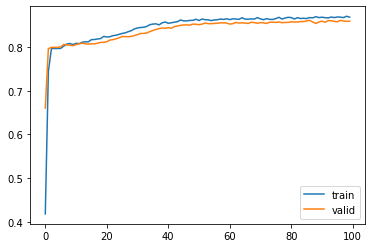

In [32]:
hist  = pd.DataFrame(history[4].history)
hist['epoch'] = history[4].epoch

import matplotlib.pyplot as plt

plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


The neural network model seems to slightly overfit after 40 epoches. However, accuracy values still keep increasing until about 100 epoches.

## 6.2 Choose the best model based on recall among many models

In [35]:
pd_matrix = pd.DataFrame()
index = 4
pd_recall = recall_history[index].history['recall_1'][-1]
pd_val_recall = recall_history[index].history['val_recall_1'][-1]
    
results = recall_model[index].evaluate(X_test_scaled, y_test, verbose=0)
    
pd_temp = pd.DataFrame(data=[[str(parameters[index]), pd_recall, pd_val_recall, results[0], results[1]]], columns=['name', 'recall', 'val_recall', 'loss', 'test_recall'])
    
pd_matrix_recall = pd_matrix.append(pd_temp)

pd_matrix_recall.reset_index(drop=True).head(20).sort_values(by=["test_recall"], ascending=False)

,name,recall,val_recall,loss,test_recall
0,"{'node': 80, 'lr': 0.001}",0.447236,0.382423,0.35616,0.47343


The recall value of 0.472 is not high enough to be used to predict which customers will be leaving for another service provider. 

# 7.0 Accuracy score and confusion matrix
Print the Accuracy score and confusion matrix (5 points)

## 7.1 Confusion matrix

2255 124 307 314


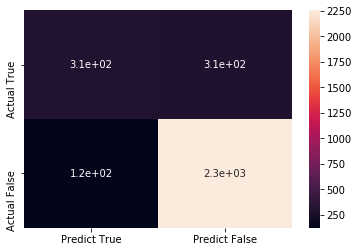

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Use model 4, which is the best model in terms of accuracy, to predict probability of customers to exit
y_test_pred = model[4].predict_proba(X_test_scaled) 
    
y_test_pred_pd = pd.DataFrame(y_test_pred, columns=['pred']).reset_index(drop=True)

# Predict the result using the probability of 0.5 as a threshold
y_test_pred_pd = y_test_pred_pd['pred'].map(lambda x : 1 if x>0.5 else 0)
    
tn, fp, fn, tp  = confusion_matrix(y_test, y_test_pred_pd).ravel()
print(tn, fp, fn, tp)

df_cm = pd.DataFrame([[tp, fn], [fp, tn]], index = ["Actual True", "Actual False"],
                  columns = ["Predict True", "Predict False"])

plt.figure(figsize = (6,4))
sn.heatmap(df_cm, annot=True)

In [38]:
df_cm

,Predict True,Predict False
Actual True,314,307
Actual False,124,2255


The accuracy of the model, using a 0.5 probability treshold is reasonable at 0.855

## 7.2 Optimizing for different business objectives

In [37]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

y_test_pred = model[4].predict_proba(X_test_scaled) 

# Use different probability tresholds to predict outcomes
for pred_prob in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    y_test_pred_pd = pd.DataFrame(y_test_pred, columns=['pred']).reset_index(drop=True)
    
    # Convert probability values to outcome values
    y_test_pred_pd = y_test_pred_pd['pred'].map(lambda x : 1 if x>pred_prob else 0)

    recall  = recall_score(y_test, y_test_pred_pd).ravel()
    precision  = precision_score(y_test, y_test_pred_pd).ravel()
    accuracy = accuracy_score(y_test, y_test_pred_pd).ravel()

    print(f"for probability below {pred_prob}, the recall = {recall}, precision = {precision}, accuracy = {accuracy}")

for probability below 0.1, the recall = [0.8921095], precision = [0.36114733], accuracy = [0.651]
for probability below 0.2, the recall = [0.784219], precision = [0.47558594], accuracy = [0.77633333]
for probability below 0.3, the recall = [0.66988728], precision = [0.56908345], accuracy = [0.82666667]
for probability below 0.4, the recall = [0.57809984], precision = [0.64684685], accuracy = [0.84733333]
for probability below 0.5, the recall = [0.50563607], precision = [0.71689498], accuracy = [0.85633333]
for probability below 0.6, the recall = [0.44766506], precision = [0.8057971], accuracy = [0.86333333]
for probability below 0.7, the recall = [0.36553945], precision = [0.8697318], accuracy = [0.85733333]
for probability below 0.8, the recall = [0.25442834], precision = [0.93491124], accuracy = [0.842]
for probability below 0.9, the recall = [0.12721417], precision = [0.97530864], accuracy = [0.81866667]


We can choose from a wide range of recall, precision or accuracy values, as show on the table above, that best match our business objectives.

we will use a probability threshold that has lower accuracy but high recall, for marketing campaign that is low cost, but the cost of losing the customers is high.

We may also use upsampling of dataset for minority class, which is Exited data set in this case, to retrain the data and potentially improve recall accuracy.